In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import cluster
from scipy import stats  ## for z-score. do we still need it?

## PART 1 - IMPORT + DATA PREPERATION

In [2]:
## READ IN DATASET TO PANDAS DATAFRAME
column_names = ("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area_01","Wilderness_Area_02","Wilderness_Area_03","Wilderness_Area_04","Soil_Type_01","Soil_Type_02","Soil_Type_03","Soil_Type_04","Soil_Type_05","Soil_Type_06","Soil_Type_07","Soil_Type_08","Soil_Type_09","Soil_Type_10","Soil_Type_11","Soil_Type_12","Soil_Type_13","Soil_Type_14","Soil_Type_15","Soil_Type_16","Soil_Type_17","Soil_Type_18","Soil_Type_19","Soil_Type_20","Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30","Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40","Cover_Type")
soil = pd.read_table("covtype.data", sep=",", names=column_names)

In [3]:
soil.shape

(581012, 55)

In [4]:
soil.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
print (soil.dtypes)
## ALL IMPORTED DATATYPES ARE NUMERICAL. THEREFORE NO WHITESPACES/BROKEN STRINGS.

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_01                    int64
Wilderness_Area_02                    int64
Wilderness_Area_03                    int64
Wilderness_Area_04                    int64
Soil_Type_01                          int64
Soil_Type_02                          int64
Soil_Type_03                          int64
Soil_Type_04                          int64
Soil_Type_05                          int64
Soil_Type_06                          int64
Soil_Type_07                          int64
Soil_Type_08                          int64
Soil_Type_09                    

In [6]:
## CONVERT WILDERNESS TYPE, SOIL TYPE AND COVER TYPE TO CATEGORICAL DATA
for pos in range(10,55):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('category')

In [7]:
print (soil.dtypes)

Elevation                                int64
Aspect                                   int64
Slope                                    int64
Horizontal_Distance_To_Hydrology         int64
Vertical_Distance_To_Hydrology           int64
Horizontal_Distance_To_Roadways          int64
Hillshade_9am                            int64
Hillshade_Noon                           int64
Hillshade_3pm                            int64
Horizontal_Distance_To_Fire_Points       int64
Wilderness_Area_01                    category
Wilderness_Area_02                    category
Wilderness_Area_03                    category
Wilderness_Area_04                    category
Soil_Type_01                          category
Soil_Type_02                          category
Soil_Type_03                          category
Soil_Type_04                          category
Soil_Type_05                          category
Soil_Type_06                          category
Soil_Type_07                          category
Soil_Type_08 

In [8]:
## CHECK IF THERE ARE ANY MISSING VALUES
print ('MISSING VALUES : ' + str(soil.isnull().values.any()))

MISSING VALUES : False


## SANITY CHECKS

In [9]:
# For numerical columns
for col in soil.columns:
    if (soil[col].dtype.name == 'int64'):
        print ('Maximum value for',soil[col].name,'=',soil[col].max(axis=0), '\n')
        print ('Minimum value for',soil[col].name,'=',soil[col].min(axis=0), '\n')

('Maximum value for', 'Elevation', '=', 3858, '\n')
('Minimum value for', 'Elevation', '=', 1859, '\n')
('Maximum value for', 'Aspect', '=', 360, '\n')
('Minimum value for', 'Aspect', '=', 0, '\n')
('Maximum value for', 'Slope', '=', 66, '\n')
('Minimum value for', 'Slope', '=', 0, '\n')
('Maximum value for', 'Horizontal_Distance_To_Hydrology', '=', 1397, '\n')
('Minimum value for', 'Horizontal_Distance_To_Hydrology', '=', 0, '\n')
('Maximum value for', 'Vertical_Distance_To_Hydrology', '=', 601, '\n')
('Minimum value for', 'Vertical_Distance_To_Hydrology', '=', -173, '\n')
('Maximum value for', 'Horizontal_Distance_To_Roadways', '=', 7117, '\n')
('Minimum value for', 'Horizontal_Distance_To_Roadways', '=', 0, '\n')
('Maximum value for', 'Hillshade_9am', '=', 254, '\n')
('Minimum value for', 'Hillshade_9am', '=', 0, '\n')
('Maximum value for', 'Hillshade_Noon', '=', 254, '\n')
('Minimum value for', 'Hillshade_Noon', '=', 0, '\n')
('Maximum value for', 'Hillshade_3pm', '=', 254, '\n')
(

In [10]:
## FOR CATEGORICAL COLUMNS

In [11]:
for col in soil.columns:
    if (soil[col].dtype.name == 'category'):
        print (soil[col].value_counts(), '\n')

(0    320216
1    260796
Name: Wilderness_Area_01, dtype: int64, '\n')
(0    551128
1     29884
Name: Wilderness_Area_02, dtype: int64, '\n')
(0    327648
1    253364
Name: Wilderness_Area_03, dtype: int64, '\n')
(0    544044
1     36968
Name: Wilderness_Area_04, dtype: int64, '\n')
(0    577981
1      3031
Name: Soil_Type_01, dtype: int64, '\n')
(0    573487
1      7525
Name: Soil_Type_02, dtype: int64, '\n')
(0    576189
1      4823
Name: Soil_Type_03, dtype: int64, '\n')
(0    568616
1     12396
Name: Soil_Type_04, dtype: int64, '\n')
(0    579415
1      1597
Name: Soil_Type_05, dtype: int64, '\n')
(0    574437
1      6575
Name: Soil_Type_06, dtype: int64, '\n')
(0    580907
1       105
Name: Soil_Type_07, dtype: int64, '\n')
(0    580833
1       179
Name: Soil_Type_08, dtype: int64, '\n')
(0    579865
1      1147
Name: Soil_Type_09, dtype: int64, '\n')
(0    548378
1     32634
Name: Soil_Type_10, dtype: int64, '\n')
(0    568602
1     12410
Name: Soil_Type_11, dtype: int64, '\n')
(

In [12]:
## SANITY CHECK: to check Wilderness_Area_01 - Wilderness_Area_04 has only one column marked as 1 
## (ie that each record/rows can only exist in one Wilderness Area at the one time)
for pos in range(10,14):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('int64')

soil['Wilderness_Type'] = soil['Wilderness_Area_01'] + soil['Wilderness_Area_02'] + soil['Wilderness_Area_03'] + soil['Wilderness_Area_04']

dup_rec = False
for i in range(soil['Wilderness_Type'].count()):
    if soil.at[i, 'Wilderness_Type'] != 1:
        dup_rec = True
        print ('Multiple Wilderness Areas detected in same row. Invalid record.')
        break

if dup_rec == False:
    print('No error records found')    

No error records found


In [13]:
## AGGREGATE ALL WILDERNESS_AREA DATA INTO NEWLY CREATE WILDERNESS_TYPE COLUMN

for i in range(soil['Wilderness_Type'].count()):
    if soil.at[i, 'Wilderness_Area_01'] == 1:
        soil.at[i, 'Wilderness_Type'] = 1
    elif soil.at[i, 'Wilderness_Area_02'] == 1:
        soil.at[i, 'Wilderness_Type'] = 2
    elif soil.at[i, 'Wilderness_Area_03'] == 1:
        soil.at[i, 'Wilderness_Type'] = 3
    else: 
        soil.at[i, 'Wilderness_Type'] = 4


In [14]:
## CREATE A NEW AGGREGATE COLUMN FOR GEOGRAPHICAL_ZONES. RECLASSIFY SOIL TYPE DATA INTO CORRESPONDING GEOGRAPHICAL ZONES.
## REFER TO "PART II. Data retrieving and preparation" IN THE REPORT FOR A DETAILED EXPLANATION.

for pos in range(14,54):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('int64')

soil['Geo_Zone'] = 7

type_5 = [20,21]
type_2 = [22,35,36]
type_1 = [27,28,29,30,32,33,34,35,36]

for i in range(soil['Geo_Zone'].count()):
    for j in type_5:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 5
    for j in type_2:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 2  
    for j in type_1:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 1
            
print (soil['Geo_Zone'].value_counts())

7    467469
1    112112
2      1147
5       284
Name: Geo_Zone, dtype: int64


In [15]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 57 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null int64
Wilderness_Area_02                    581012 non-null int64
Wilderness_Area_03                    581012 non-null int64
Wilderness_Area_04                    581012 non-null int64
Soil_Type_01                          581012 non-

In [16]:
## CONVERT WILDERNESS TYPES, SOIL TYPES AND GEO ZONES ALL BACK TO CATEGORICAL DATA
for pos in range(10,57):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('category')

In [17]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 57 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null category
Wilderness_Area_02                    581012 non-null category
Wilderness_Area_03                    581012 non-null category
Wilderness_Area_04                    581012 non-null category
Soil_Type_01                         

In [18]:
soil_features_subset = soil[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Cover_Type','Wilderness_Type','Geo_Zone']]

# PART 2 - DATA EXPLORATION 

### A - EXPLORE EACH COLUMN

#### USING APPROPRIATE DESCRIPTIVE STATISTICS

In [19]:
# DESCRIPTIVE STATISTICS FOR NUMERICAL VALUES
soil_features_subset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000


In [20]:
# 'DESCRIPTIVE STATISTICS' NOT POSSIBLE FOR CATEGORICAL THEREFORE AN EXPLORATION OF PROPORTIONALITY EXPLORED

In [21]:
for col in soil_features_subset.columns:
    if (soil_features_subset[col].dtype.name == 'category'):
        print soil_features_subset[col].value_counts(normalize=True), '\n'

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64 

1    0.448865
3    0.436074
4    0.063627
2    0.051434
Name: Wilderness_Type, dtype: float64 

7    0.804577
1    0.192960
2    0.001974
5    0.000489
Name: Geo_Zone, dtype: float64 



### TASK 2 EXPLORE INIDIVIDUAL AND RELATIONSHIPS OF ATTRIBUTES

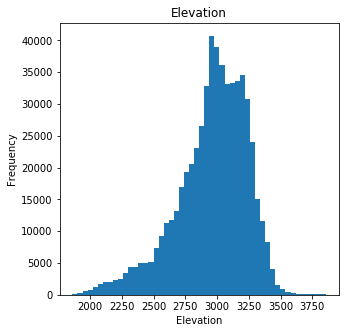

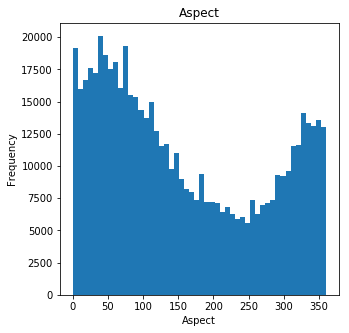

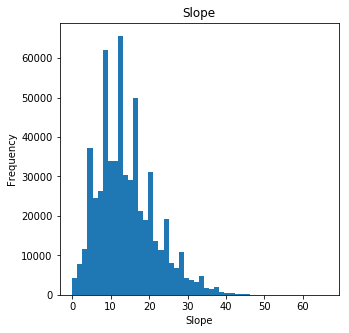

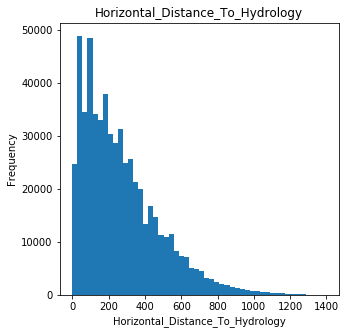

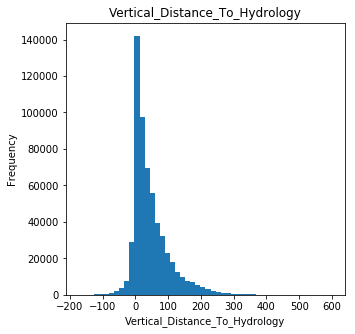

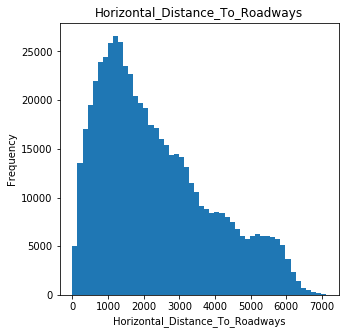

In [51]:
## HISTOGRAMS FOR NUMERICAL DATA EXPLORATION

for i, col in enumerate(soil_features_subset.columns):
    if i == 10:
        break
    if (soil_features_subset[col].dtype.name == 'int64'):
        plt.figure(figsize=(5, 5))
        soil_features_subset[col].plot(kind='hist', bins=50)
        plt.title(col)
        plt.xlabel(col)
        axes = plt.gca()
        plt.show()

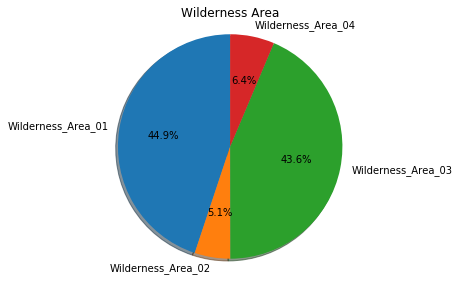

In [19]:
# TEMPORARILY CONVERT WILDERNESS AREA TO NUMERIC TO CREATE PIE CHART

soil_copy = soil.copy(deep=True)

columns = []
values = []

for pos in range(10,14):
    soil_copy[soil_copy.columns[pos]] = soil_copy[soil_copy.columns[pos]].astype('int64')
    columns.append(soil_copy.columns[pos])
    values.append(soil_copy[soil_copy.columns[pos]].sum())
    
plt.pie(values, autopct='%1.1f%%',shadow=True, labels=columns, startangle=90)
plt.axis('equal')
plt.title('Wilderness Area')
plt.tight_layout()
plt.show()

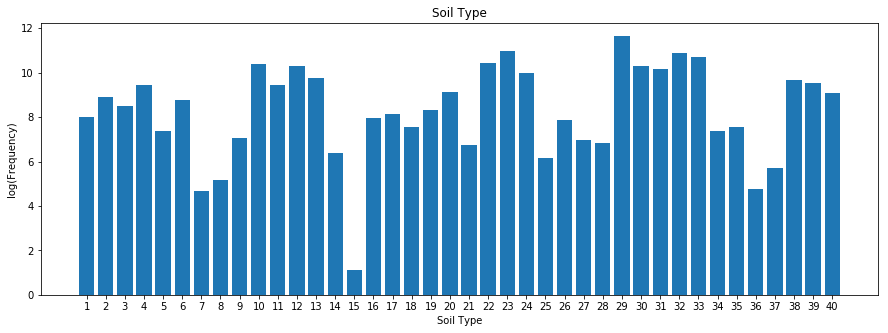

In [20]:
# TEMPORARILY CONVERT SOIL TYPE TO NUMERIC TO CREATE BAR CHART

soil_copy = soil.copy(deep=True)

columns = []
values = []

i = 1 

for pos in range(14,54):
    soil_copy[soil_copy.columns[pos]] = soil_copy[soil_copy.columns[pos]].astype('int64')
    columns.append(i)
    values.append(np.log(soil_copy[soil_copy.columns[pos]].sum()))
    i+=1
    
plt.bar(columns, values)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title("Soil Type")
plt.xlabel('Soil Type')
plt.ylabel('log(Frequency)')
plt.xticks(columns)
plt.show()

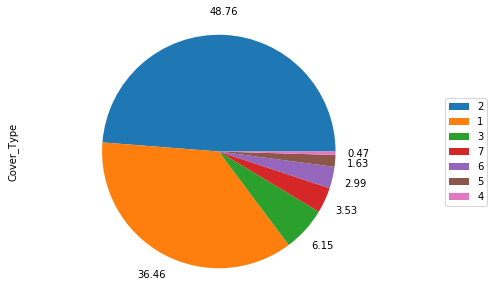

In [21]:
# PIE CHART OF COVER TYPE

soil_features_subset['Cover_Type'].value_counts().plot(kind='pie',labels=None, autopct='%.2f', pctdistance=1.2)
plt.legend(labels = soil_features_subset['Cover_Type'].value_counts().index, loc="right", bbox_to_anchor=(1.2, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

### TASK 2 SECTION B - EXPLORE PAIRS OF ATTRIBUTES

Text(0.5,1,u'Elevation vs Slope')

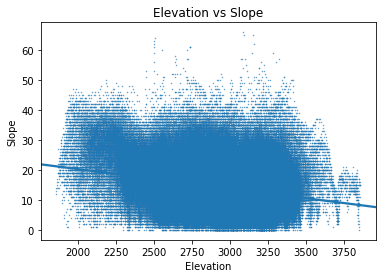

In [59]:
# Regression plot of Elevation vs Slope
sns.regplot(x="Elevation", y="Slope", data=soil_features_subset, marker='o', scatter_kws={'s':0.2}).set_title('Elevation vs Slope')

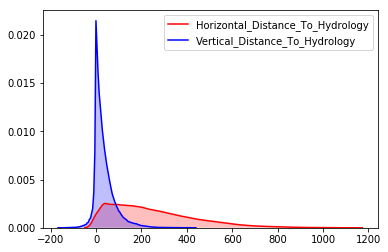

In [33]:
# Distribution of Horizontal and Vertical Distance to Hydrology

p1=sns.kdeplot(soil_features_subset['Horizontal_Distance_To_Hydrology'], shade=True, color="r")
p1=sns.kdeplot(soil_features_subset['Vertical_Distance_To_Hydrology'], shade=True, color="b")

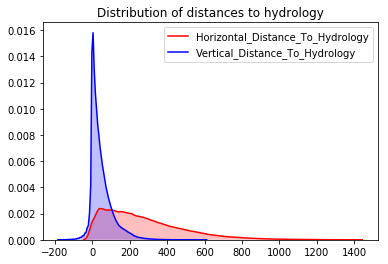

In [24]:
# Distribution of distances to hydrology

p1=sns.kdeplot(soil_features_subset['Horizontal_Distance_To_Hydrology'], shade=True, color="r").set_title('Distribution of distances to hydrology')
p1=sns.kdeplot(soil_features_subset['Vertical_Distance_To_Hydrology'], shade=True, color="b")

Text(0.5,1,'Aspect Ratio vs Hillshade Index at 3pm')

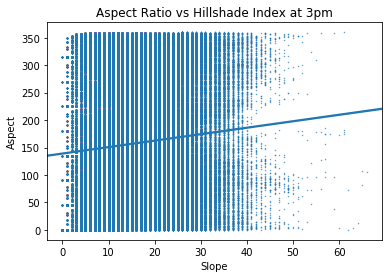

In [27]:
# Aspect Ratio vs Hillshade Index at 3pm

sns.regplot(x="Slope", y="Aspect", data=soil_features_subset, marker='o', scatter_kws={'s':0.2}).set_title('Aspect Ratio vs Hillshade Index at 3pm')

Text(0.5,1,'Elevation vs Vertical Distance To Land Water Feature (Hyrdology)')

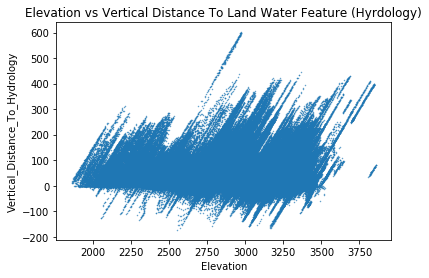

In [28]:
# Vertical Distance to Hyrdology vs Elevation

sns.regplot(x="Elevation", y="Vertical_Distance_To_Hydrology", data=soil_features_subset, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Vertical Distance To Land Water Feature (Hyrdology)')

Text(0.5,1,'Elevation vs Horizontal Distance To Roadways')

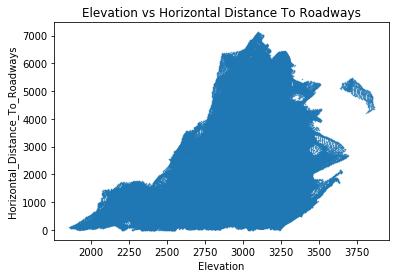

In [29]:
# Vertical Distance to Hyrdology vs Elevation

sns.regplot(x="Elevation", y="Horizontal_Distance_To_Roadways", data=soil_features_subset, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Horizontal Distance To Roadways')

Text(0.5,1,'Elevation vs Horizontal Distance To Roadways')

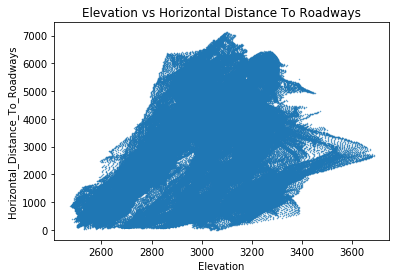

In [30]:
# Regression plot of Elevation vs Horizontal Distance to Roadways

sns.regplot(x="Elevation", y="Horizontal_Distance_To_Roadways", data=soil_features_subset, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Horizontal Distance To Roadways')

Text(0.5,1,'Elevation vs Horizontal Distance To Roadways')

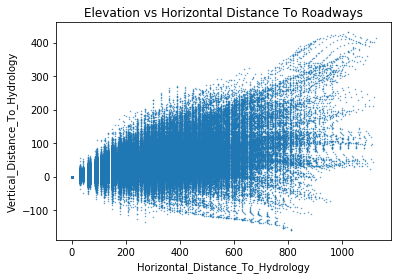

In [31]:
sns.regplot(x="Horizontal_Distance_To_Hydrology", y="Vertical_Distance_To_Hydrology", data=soil_features_subset, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Horizontal Distance To Roadways')

In [32]:
# Convert categorical columns to int64 in preparation for further exploration

for col in soil_features_subset.columns:
    soil_features_subset[col] = soil_features_subset[col].astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## GRAPHS FOR FURTHER EXPLORATION THROUGH CLUSTERING

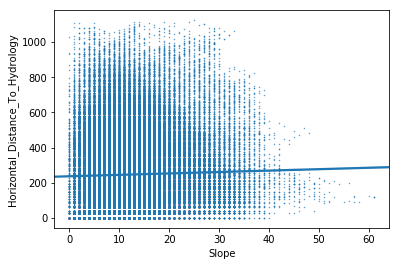

In [34]:
# Regression plot comparing slope and Horizontal Distance to Hydrology 

sns.regplot(x="Slope", y="Horizontal_Distance_To_Hydrology", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})

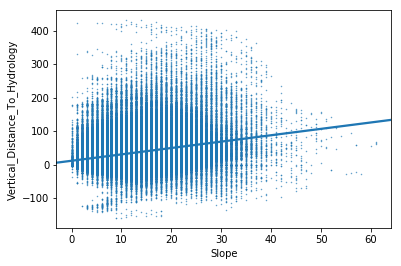

In [35]:
# Regression plot comparing slope and Vertical Distance to Hydrology 

sns.regplot(x="Slope", y="Vertical_Distance_To_Hydrology", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})

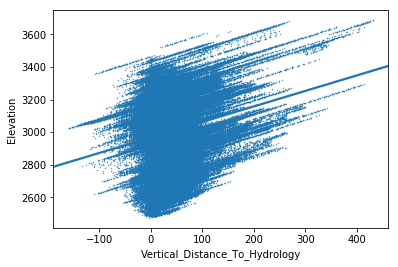

In [36]:
# Regression plot comparing Vertical Distance to Hydrology and Elevation

sns.regplot(x="Vertical_Distance_To_Hydrology", y="Elevation", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})

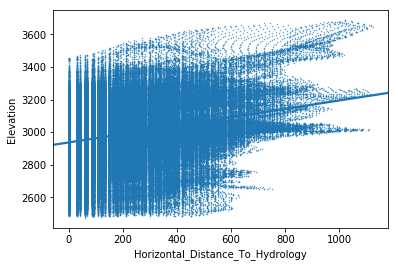

In [37]:
# Regression plot comparing Vertical Distance to Hydrology and Elevation

sns.regplot(x="Horizontal_Distance_To_Hydrology", y="Elevation", data=soil_set_wild1, marker='o', scatter_kws={'s':0.2})

In [38]:
# Create a new dataset where Geo Zone, Wilderness Type and Cover Type are categorical. Categorical data is easier to scatter plot. 

soil_set_wild1_modified = soil_set_wild1.copy(deep=True)
soil_set_wild1_modified[soil_set_wild1_modified.columns[11]] = soil_set_wild1_modified[soil_set_wild1_modified.columns[11]].astype('category')
soil_set_wild1_modified[soil_set_wild1_modified.columns[10]] = soil_set_wild1_modified[soil_set_wild1_modified.columns[10]].astype('category')
soil_set_wild1_modified[soil_set_wild1_modified.columns[9]] = soil_set_wild1_modified[soil_set_wild1_modified.columns[9]].astype('category')

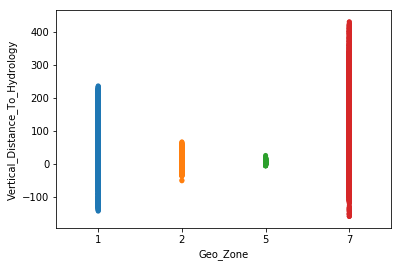

In [39]:
# Scatter plot comparing Geo Zone and Vertical Distance to Hydrology

sns.stripplot(x="Geo_Zone", y="Vertical_Distance_To_Hydrology", data=soil_set_wild1_modified)

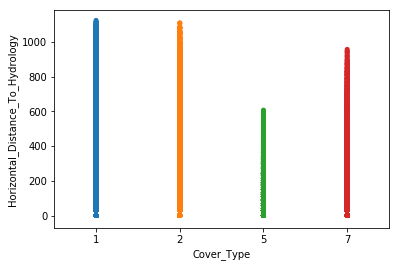

In [40]:
# Scatter plot comparing Geo Zone and Vertical Distance to Hydrology

sns.stripplot(x="Cover_Type", y="Horizontal_Distance_To_Hydrology", data=soil_set_wild1_modified)

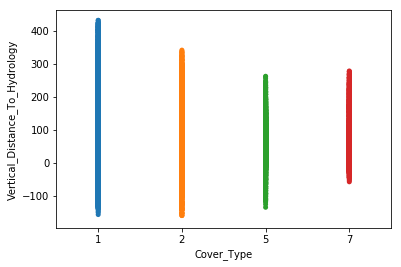

In [41]:
# Scatter plot comparing Cover Type and Vertical Distance to Hydrology

sns.stripplot(x="Cover_Type", y="Vertical_Distance_To_Hydrology", data=soil_set_wild1_modified)

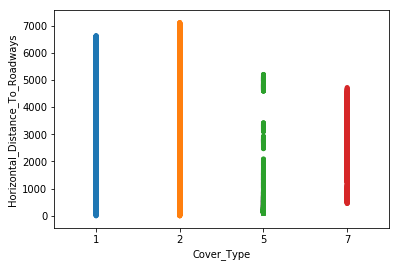

In [42]:
# Scatter plot comparing Cover Type and Horizontal Distance to Roadways

sns.stripplot(x="Cover_Type", y="Horizontal_Distance_To_Roadways", data=soil_set_wild1_modified)

In [43]:
soil_set_wild1_modified.dtypes

Elevation                              int64
Aspect                                 int64
Slope                                  int64
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Roadways        int64
Hillshade_9am                          int64
Hillshade_Noon                         int64
Hillshade_3pm                          int64
Cover_Type                          category
Wilderness_Type                     category
Geo_Zone                            category
dtype: object

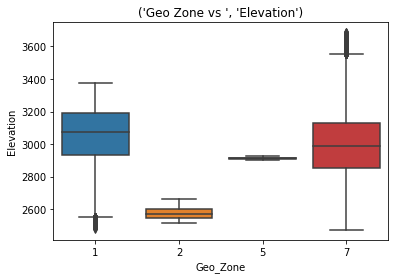

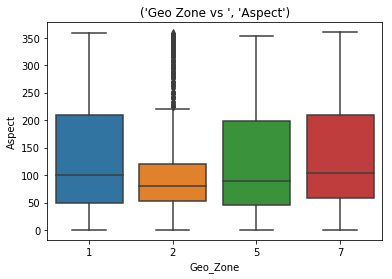

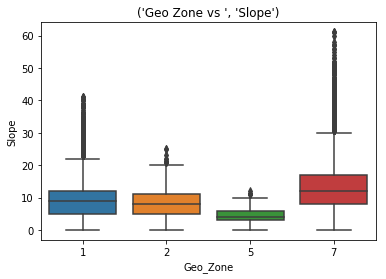

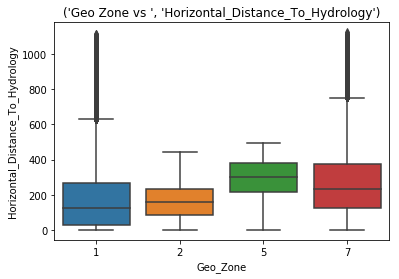

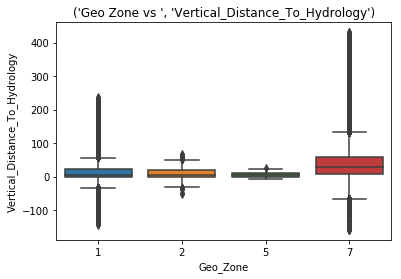

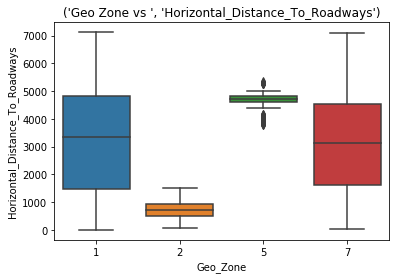

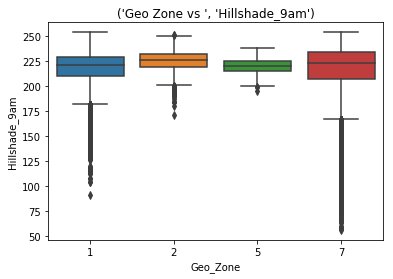

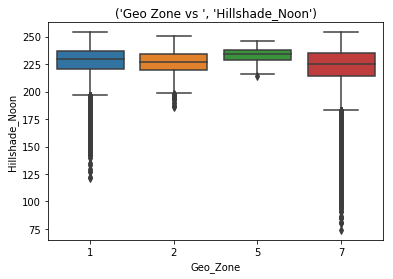

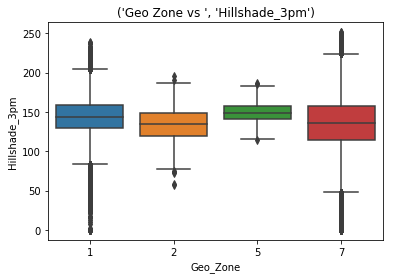

In [44]:
# Comparing Geo Zone vs Numerical Data

for i, col in enumerate(soil_set_wild1_modified.columns):
    if (soil_set_wild1_modified[col].dtype.name == 'int64'):
        plt.figure(i)
        titles = 'Geo Zone vs ', col
        sns.boxplot(x=soil_set_wild1_modified["Geo_Zone"], y=soil_set_wild1_modified[col]).set_title(titles)

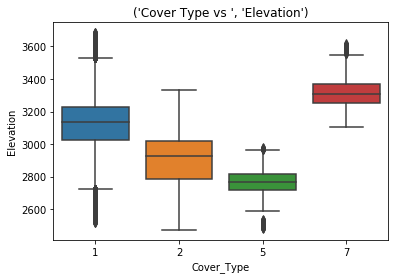

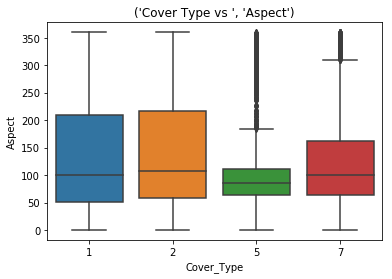

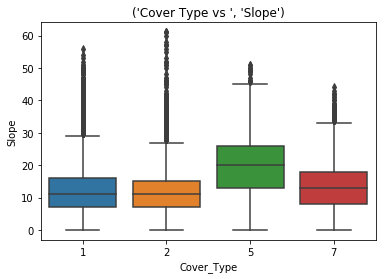

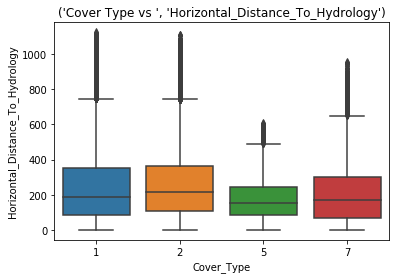

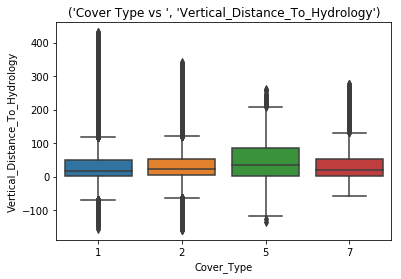

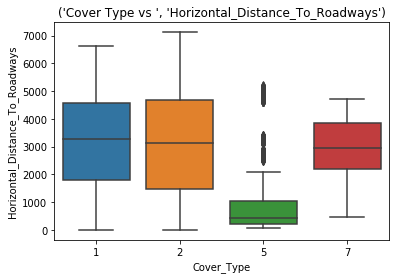

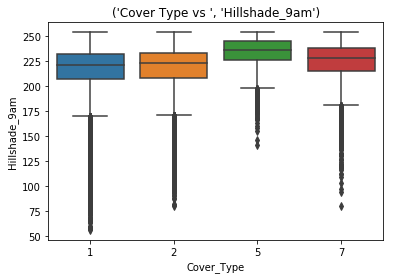

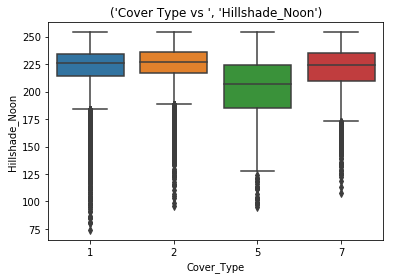

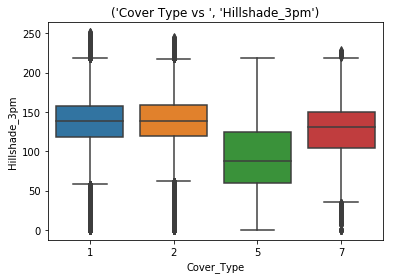

In [45]:
# Comparing Cover Type vs Numerical Data

for i, col in enumerate(soil_set_wild1_modified.columns):
    if (soil_set_wild1_modified[col].dtype.name == 'int64'):
        plt.figure(i)
        titles = 'Cover Type vs ', col
        sns.boxplot(x=soil_set_wild1_modified["Cover_Type"], y=soil_set_wild1_modified[col]).set_title(titles)

In [46]:
# Prepare data for k means clustering by copying data to a new frame and calculating zscores for the columns

df_tr = soil_set_wild1.copy(deep=True)
clmns = np.array(soil_set_wild1.columns)
df_tr_std = stats.zscore(df_tr[clmns])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [47]:
## Create Scatter Matrix

#from pandas.plotting import scatter_matrix
#scatter_matrix(soil,alpha=0.2,figsize=(80, 80),diagonal='hist')

## PART 3: MODELLING

In [32]:
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

#### PREPARING ALL FUNCTIONS

In [234]:
def create_cluster_summary_dbscans():
    cluster_desc_columns = []#['Cluster','Avg. Dist to Water','Avg. Horz. Dist to Water','Avg. Vert. Dist to Water','Avg. Horz. Dist to Roadways','Avg. Elevation','Avg. Slope','Avg. Aspect','Most common soil type','% Soil type 1','% Soil type 2','% Soil type 3','Most common cover type','% Cover Type 1','% Cover Type 2','% Cover Type 3','% Cover Type 4','% Cover Type 5','% Cover Type 6','% Cover Type 7']
    cluster_descriptions = pd.DataFrame(columns=cluster_desc_columns, index=range(0,len(model_prep.clusters.unique()))) 

    cluster_list = []
    avg_dist_water_list = []
    avg_h_dist_water_list = []
    avg_v_dist_water_list = []
    avg_h_dist_road_list = []
    covertype_cluster_list = []
    prop_covertype01_cluster_list = []
    prop_covertype02_cluster_list = []
    prop_covertype03_cluster_list = []
    prop_covertype04_cluster_list = []
    prop_covertype05_cluster_list = []
    prop_covertype06_cluster_list = []
    prop_covertype07_cluster_list = []
    soiltype_cluster_list = []
    prop_geozone01_cluster_list = []
    prop_geozone02_cluster_list = []
    prop_geozone05_cluster_list = []
    prop_geozone07_cluster_list = []
    elevation_mean_cluster_list = []
    slope_mean_cluster_list = []


    for i in range(0,max(model_prep.clusters)+2):

        cluster_num = i - 1
            
        # WHICH CLUSTER - CREATE MASK AND BUILD CLUSTER LIST
        mask_name = "cluster_descriptions_mask_"+str(cluster_num)
        mask_name = model_prep["clusters"] == cluster_num
        cluster_list.append(cluster_num)
        cluster_array = np.asarray(cluster_list)
     
        # DISTANCE TO WATER - MEAN OF CLUSTER + ADD TO LIST
        water_mean_cluster = model_prep.loc[mask_name,"distance_to_water"].mean()
        avg_dist_water_list.append(water_mean_cluster)
        avg_dist_water_array = np.asarray(avg_dist_water_list)
    
        #AVG HORIZONTAL DISTANCE TO WATER
        h_water_mean_cluster = model_prep.loc[mask_name,"Horizontal_Distance_To_Hydrology"].mean()
        avg_h_dist_water_list.append(h_water_mean_cluster)
        avg_h_dist_water_array = np.asarray(avg_h_dist_water_list)
        
        #AVG VERTICAL DISTANCE TO WATER
        v_water_mean_cluster = model_prep.loc[mask_name,"Vertical_Distance_To_Hydrology"].mean()
        avg_v_dist_water_list.append(v_water_mean_cluster)
        avg_v_dist_water_array = np.asarray(avg_v_dist_water_list)
        
        #AVG HORIZ DISTANCE TO ROADWAYS
        h_road_mean_cluster = model_prep.loc[mask_name,"Horizontal_Distance_To_Roadways"].mean()
        avg_h_dist_road_list.append(h_road_mean_cluster)
        avg_h_dist_road_array = np.asarray(avg_h_dist_road_list)
    
        # MOST COMMON COVER TYPE
        covertype_cluster = model_prep.loc[mask_name,"Cover_Type"].mode()
        covertype_cluster_list.append(covertype_cluster)
        covertype_cluster_array = np.asarray(covertype_cluster_list)
    
        #'PROPORTION OF COVER TYPE 1',
        mask_name_covertype_num_1 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 1) 
        prop_covertype01_cluster = float(model_prep.loc[mask_name_covertype_num_1,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype01_cluster_list.append(prop_covertype01_cluster)
        prop_covertype01_cluster_array = np.asarray(prop_covertype01_cluster_list)   
        
        #'PROPORTION OF COVER TYPE 2',
        mask_name_covertype_num_2 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 2) 
        prop_covertype02_cluster = float(model_prep.loc[mask_name_covertype_num_2,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype02_cluster_list.append(prop_covertype02_cluster)
        prop_covertype02_cluster_array = np.asarray(prop_covertype02_cluster_list)
        
        #'PROPORTION OF COVER TYPE 3',
        mask_name_covertype_num_3 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 3) 
        prop_covertype03_cluster = float(model_prep.loc[mask_name_covertype_num_3,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype03_cluster_list.append(prop_covertype03_cluster)
        prop_covertype03_cluster_array = np.asarray(prop_covertype03_cluster_list)  
        
        #'PROPORTION OF COVER TYPE 4',
        mask_name_covertype_num_4 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 4) 
        prop_covertype04_cluster = float(model_prep.loc[mask_name_covertype_num_4,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype04_cluster_list.append(prop_covertype04_cluster)
        prop_covertype04_cluster_array = np.asarray(prop_covertype04_cluster_list) 
        
        #'PROPORTION OF COVER TYPE 5',
        mask_name_covertype_num_5 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 5) 
        prop_covertype05_cluster = float(model_prep.loc[mask_name_covertype_num_5,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype05_cluster_list.append(prop_covertype05_cluster)
        prop_covertype05_cluster_array = np.asarray(prop_covertype05_cluster_list) 
        
        #'PROPORTION OF COVER TYPE 6',
        mask_name_covertype_num_6 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 6) 
        prop_covertype06_cluster = float(model_prep.loc[mask_name_covertype_num_5,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype06_cluster_list.append(prop_covertype06_cluster)
        prop_covertype06_cluster_array = np.asarray(prop_covertype06_cluster_list) 
    
        #'PROPORTION OF COVER TYPE 7',
        mask_name_covertype_num_7 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 7) 
        prop_covertype07_cluster = float(model_prep.loc[mask_name_covertype_num_5,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype07_cluster_list.append(prop_covertype07_cluster)
        prop_covertype07_cluster_array = np.asarray(prop_covertype07_cluster_list) 
        
        # MOST COMMON SOIL TYPE
        soiltype_cluster = model_prep.loc[mask_name,"Geo_Zone"].mode()
        soiltype_cluster_list.append(soiltype_cluster)
        soiltype_cluster_array = np.asarray(soiltype_cluster_list)
        
        #AVG ELEVATION
        elevation_mean_cluster = model_prep.loc[mask_name,"Elevation"].mean()
        elevation_mean_cluster_list.append(elevation_mean_cluster)
        elevation_mean_cluster_array = np.asarray(elevation_mean_cluster_list)
        
        #AVG SLOPE
        slope_mean_cluster = model_prep.loc[mask_name,"Slope"].mean()
        slope_mean_cluster_list.append(slope_mean_cluster)
        slope_mean_cluster_array = np.asarray(slope_mean_cluster_list)
        
        #'PROPORTION OF GEOZONE 1',
        mask_name_geozone_num_1 = (model_prep["clusters"] == cluster_num) & (model_prep["Geo_Zone"] == 1) 
        prop_geozone01_cluster = float(model_prep.loc[mask_name_geozone_num_1,"Geo_Zone"].count())/float(model_prep.loc[mask_name,"Geo_Zone"].count())
        prop_geozone01_cluster_list.append(prop_geozone01_cluster)
        prop_geozone01_cluster_array = np.asarray(prop_geozone01_cluster_list)  
        
        #'PROPORTION OF GEOZONE 2',
        mask_name_geozone_num_2 = (model_prep["clusters"] == cluster_num) & (model_prep["Geo_Zone"] == 2) 
        prop_geozone02_cluster = float(model_prep.loc[mask_name_geozone_num_2,"Geo_Zone"].count())/float(model_prep.loc[mask_name,"Geo_Zone"].count())
        prop_geozone02_cluster_list.append(prop_geozone02_cluster)
        prop_geozone02_cluster_array = np.asarray(prop_geozone02_cluster_list)  
                
        #'PROPORTION OF GEOZONE 5',
        mask_name_geozone_num_5 = (model_prep["clusters"] == cluster_num) & (model_prep["Geo_Zone"] == 5) 
        prop_geozone05_cluster = float(model_prep.loc[mask_name_geozone_num_5,"Geo_Zone"].count())/float(model_prep.loc[mask_name,"Geo_Zone"].count())
        prop_geozone05_cluster_list.append(prop_geozone05_cluster)
        prop_geozone05_cluster_array = np.asarray(prop_geozone05_cluster_list)  
       
        #'PROPORTION OF GEOZONE 7',
        mask_name_geozone_num_7 = (model_prep["clusters"] == cluster_num) & (model_prep["Geo_Zone"] == 7) 
        prop_geozone07_cluster = float(model_prep.loc[mask_name_geozone_num_7,"Geo_Zone"].count())/float(model_prep.loc[mask_name,"Geo_Zone"].count())
        prop_geozone07_cluster_list.append(prop_geozone07_cluster)
        prop_geozone07_cluster_array = np.asarray(prop_geozone07_cluster_list)  
        
    cluster_descriptions['Cluster'] = cluster_array
    cluster_descriptions['Dist. to Water'] = avg_dist_water_array
    cluster_descriptions['Horiz. Dist. to Water'] = avg_h_dist_water_array
    cluster_descriptions['Vert. Dist. to Water'] = avg_v_dist_water_array
    cluster_descriptions['Elevation'] = elevation_mean_cluster_array
    cluster_descriptions['Slope'] = slope_mean_cluster_array
    cluster_descriptions['Most Common Covertype'] = covertype_cluster_array
    cluster_descriptions['Prop. Covertype 1'] = prop_covertype01_cluster_array
    cluster_descriptions['Prop. Covertype 2'] = prop_covertype02_cluster_array
    cluster_descriptions['Prop. Covertype 3'] = prop_covertype03_cluster_array
    cluster_descriptions['Prop. Covertype 4'] = prop_covertype04_cluster_array
    cluster_descriptions['Prop. Covertype 5'] = prop_covertype05_cluster_array
    cluster_descriptions['Prop. Covertype 6'] = prop_covertype06_cluster_array
    cluster_descriptions['Prop. Covertype 7'] = prop_covertype07_cluster_array
    cluster_descriptions['Most Common Geozone'] = soiltype_cluster_array
    cluster_descriptions['Prop. Geozone 1'] = prop_geozone01_cluster_array
    cluster_descriptions['Prop. Geozone 2'] = prop_geozone02_cluster_array
    cluster_descriptions['Prop. Geozone 5'] = prop_geozone05_cluster_array
    cluster_descriptions['Prop. Geozone 7'] = prop_geozone07_cluster_array
    cluster_descriptions['Horiz. Dist. to Road'] = avg_h_dist_road_array
    cluster_descriptions.sort_values('Dist. to Water')   
    
    return cluster_descriptions


    


In [227]:
########################
##VISUALISATION FUNCTION
########################
def plot_clusters_graph(variable_1,variable_2):  
    #DO SOMETHING ABOUT OUTLIERS...CHANGE COLOURS SO I HAVE MORE CONTROL 
    #color_map = {-1 : '#333333', 0:"1FAAE0",1:"#63AEDC",2:"#6C9367",3:"#2E5B5D",4:"#5D5729",5:"#B7C7B3",6:"#966F58",7:"#A09466",8:"#966F58",9:"#D4AD9A"}
    title = "DBSCAN scatter plot for "+str(model.columns[0])+" vs "+str(model.columns[1])+" using an eps = "+ str(epsilon)+" and a min_sample of "+ str(minPts)
    plt.figure(figsize=(15, 15))
    plt.title(title)
    plt.scatter(model.iloc[:,0],model.iloc[:,1], c=labels, alpha = 0.8, s= 250.0, lw= 0)
    plt.legend(model["clusters"]) 
    plt.grid()
    plt.show() 
    
########################
##VISUALISATION FUNCTION
########################
def plot_clusters_graph_kmeans(variable_1,variable_2):
    title = "KMEANS scatter plot for "+str(model.columns[0])+" vs "+str(model.columns[1])+" using k = "+ str(no_clusters)+" and a random seed of "+ str(random_state)
    plt.figure(figsize=(15, 15))
    plt.scatter(model.iloc[:,0],model.iloc[:,1], c=labels, alpha = 0.8, s= 250.0, lw= 0)
    plt.title(title)
    plt.ylabel("Vertical_Distance_To_Hydrology")
    plt.xlabel("Horizontal_Distance_To_Hydrology")
    plt.show() 
    
########################
##TRANSFORMATION FUNCTION
########################   
def c_distance_to_water():
    
    model["distance_to_water"] = ((model.iloc[:,0])**2 + (model.iloc[:,1])**2)**0.5
    model_prep["distance_to_water"] = model["distance_to_water"]
    distance_groupings = model['distance_to_water'].max()/(model['clusters'].max()+1)
    distance_groupings
    model['d_group'] = 0
    
    distance_to_water_mask_1 = (model['distance_to_water'] == 0)
    model.loc[distance_to_water_mask_1, 'd_group'] = 1
    
    distance_to_water_mask_2 = (model['distance_to_water'] > 0) & (model['distance_to_water'] <= 41.725292)
    model.loc[distance_to_water_mask_2, 'd_group'] = 2
    
    distance_to_water_mask_3 = (model['distance_to_water'] > 41.725292) & (model['distance_to_water'] <= 51.039201)
    model.loc[distance_to_water_mask_3, 'd_group'] = 3
    
    distance_to_water_mask_4 = (model['distance_to_water'] > 51.039201) & (model['distance_to_water'] <= 79.611557)
    model.loc[distance_to_water_mask_4, 'd_group'] = 4
    
    distance_to_water_mask_5 = (model['distance_to_water'] > 79.611557) & (model['distance_to_water'] <= 109.772492)
    model.loc[distance_to_water_mask_5, 'd_group'] = 5
    
    distance_to_water_mask_6 = (model['distance_to_water'] > 109.772492) & (model['distance_to_water'] <= 152.118375)
    model.loc[distance_to_water_mask_6, 'd_group'] = 6
    
    distance_to_water_mask_7 = (model['distance_to_water'] > 152.118375) & (model['distance_to_water'] <= 168.961534)
    model.loc[distance_to_water_mask_7, 'd_group'] = 7

    distance_to_water_mask_8 = (model['distance_to_water'] > 168.961534) & (model['distance_to_water'] <= 196.540072)
    model.loc[distance_to_water_mask_8, 'd_group'] = 8
    
    distance_to_water_mask_9 = (model['distance_to_water'] > 196.540072) 
    model.loc[distance_to_water_mask_9, 'd_group'] = 9
    
    
#####################
##VALIDATION FUNCTION
#####################
def validate_test():
    
    c_distance_to_water()
    
    # clustering result
    clustering_result = model[["clusters", "d_group", "c"]].groupby(["clusters", "d_group"]).agg("count") 
    
    # confusion matrix
    confusion_matrix = (clustering_result.reset_index().pivot_table(index='clusters', columns='d_group', values='c', aggfunc='sum', fill_value=0))
    print "This is the confusion matrix\n"
    print(confusion_matrix)

    # boxplots 
    for col in model_prep.columns: 
        title = 'Box plot of '+col+' by clusters'
        plt.figure(col)
        model_prep.boxplot(column=col,by='clusters')
        plt.title(title)
        plt.suptitle("")
        plt.ylabel(col) 
        
    model.boxplot(column="distance_to_water",by='clusters')


## CREATING CLUSTER SUMMARY/ COMPARISON DATAFRAME 

## KMEANS

In [239]:
####################################################################################### 
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED: HORIZONTAL HYRDO to VERTICAL HYRDO
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 3
variable_2 = 4

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_prep = soil_features_subset.copy(deep=True) 
model_prep.drop(model_prep.index[10000:], inplace=True)
model_df = model_prep.iloc[:,[variable_1,variable_2]] 
model = pd.DataFrame(model_df, index=model_df.index, columns=model_df.columns)

In [68]:
#Elbow curve#Elbow cu 
current_clmns = []

current_clmns.append(model_prep.columns[variable_1])
current_clmns.append(model_prep.columns[variable_2])

Text(0,0.5,u'Sum Squared Error')

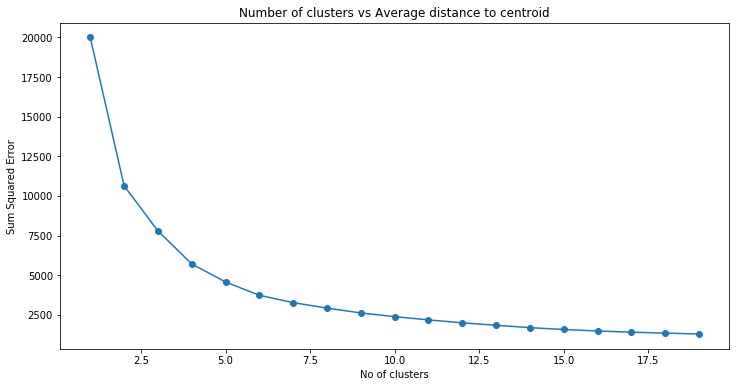

In [69]:
# In the preliminary stage of modelling, different k values for the elbow curve were compared.
# This was used to narrow down the range of k values to test

df_tr_std = stats.zscore(model[current_clmns])

cluster_range_elbow  = range( 1, 20 )
cluster_errors_elbow = []

for num_clusters in cluster_range_elbow:
    clusters = cluster.KMeans( num_clusters )
    clusters.fit( df_tr_std )
    cluster_errors_elbow.append( clusters.inertia_ )

#Graph- Elbow Curve
clusters_df_elbow = pd.DataFrame( { "num_clusters":cluster_range_elbow, "cluster_errors": cluster_errors_elbow } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df_elbow.num_clusters, clusters_df_elbow.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Error')

In [71]:
#Test the change in sum squared error for different seed values

seed_range  = range( 1, 5 )
cluster_errors = []

for seed_num in seed_range:
    clusters = cluster.KMeans( n_clusters=9, random_state=seed_num )
    clusters.fit( df_tr_std )
    cluster_errors.append( clusters.inertia_ )

seed_df = pd.DataFrame( { "seed number":seed_range, "cluster_errors": cluster_errors } )
seed_df[0:10]

,cluster_errors,seed number
0,2616.678641,1
1,2616.717210,2
2,2616.617990,3
3,2617.182600,4


In [72]:
# Comparing number of clusters vs sum squared error
df_tr_std = stats.zscore(model_prep[current_clmns])

# Test range for the number of clusters based on observations of the elbow curve for the default number of iterations of 300
cluster_range  = range( 4, 10 )
cluster_errors = []
cluster_error_percent_change = []
seed_num = 4

# The number of iterations of K Means that are tested against each k number of clusters. Default number of iterations is 300.
Iterations_range  = [150, 200, 250, 300, 500]
cluster_range_total = []
Iterations_total = []
cluster_errors = []

#Index value used to keep track of the error rate
i = 0

for it in Iterations_range:
    for num_clusters in cluster_range:
        clusters = cluster.KMeans( num_clusters, max_iter= it, random_state= seed_num)
        clusters.fit( df_tr_std )
        cluster_errors.append( clusters.inertia_ )
        Iterations_total.append(it)
        cluster_range_total.append(num_clusters)
        if (i>1):
            cluster_error_percent_change.append((cluster_errors[i-1]-cluster_errors[i])/(cluster_errors[i]+cluster_errors[i-1])*100)
        else:
            cluster_error_percent_change.append(0)
        i = i + 1

In [73]:
#Print Error table
#clusters_df = pd.DataFrame( { "cluster_error_percent_change (%)": cluster_error_percent_change, "cluster_errors": cluster_errors, "num_clusters":cluster_range   } )
#clusters_df[0:16]

#Print Error table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range_total, "num_iterations":Iterations_total, "cluster_error_percent_change (%)": cluster_error_percent_change, "cluster_errors": cluster_errors  } )

# Sort clusters_df by cluster_errors then by cluster_error_percent_change 
clusters_df_sorted = clusters_df.sort_values(['cluster_errors','cluster_error_percent_change (%)'],ascending=True)
clusters_df_sorted = clusters_df_sorted.reindex(["num_clusters", "num_iterations", "cluster_error_percent_change (%)", "cluster_errors"], axis=1)
clusters_df_sorted[0:16]

,num_clusters,num_iterations,cluster_error_percent_change (%),cluster_errors
5,9,150,5.498471,2617.182600
11,9,200,5.498471,2617.182600
17,9,250,5.498471,2617.182600
23,9,300,5.498471,2617.182600
29,9,500,5.498471,2617.182600
4,8,150,5.588902,2921.738595
10,8,200,5.588902,2921.738595
16,8,250,5.588902,2921.738595
22,8,300,5.588902,2921.738595
28,8,500,5.588902,2921.738595


## Running the model

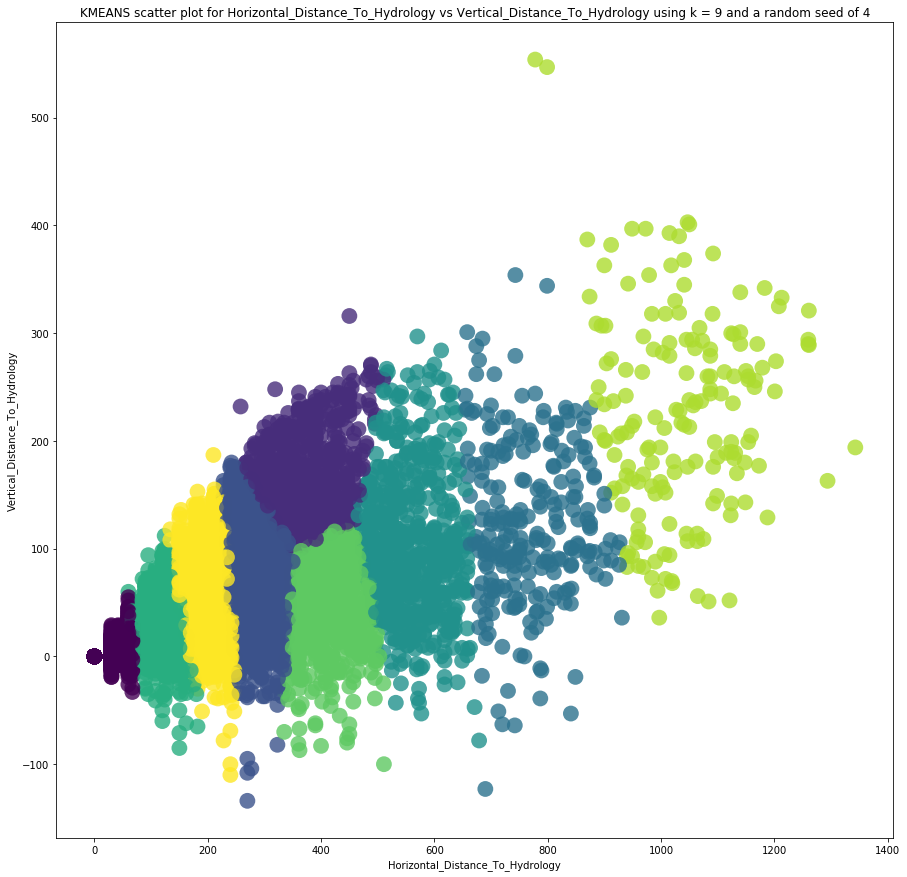

This is the confusion matrix

d_group      1    2    3    4    5    6    7    8     9
clusters                                               
0         1069  795  296  565    1    0    0    0     0
1            0    0    0    0    0    0    0    0   638
2            0    0    0    0    0    0    0    0  1409
3            0    0    0    0    0    0    0    0   248
4            0    0    0    0    0    0    0    0   645
5            0    0    0   44  629  887  190   10     0
6            0    0    0    0    0    0    0    0   787
7            0    0    0    0    0    0    0    0   169
8            0    0    0    0    0    0  107  556   955


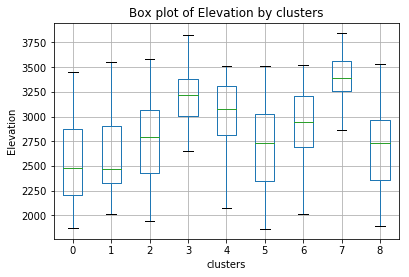

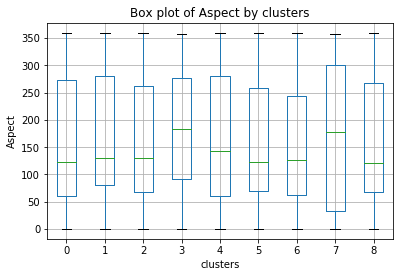

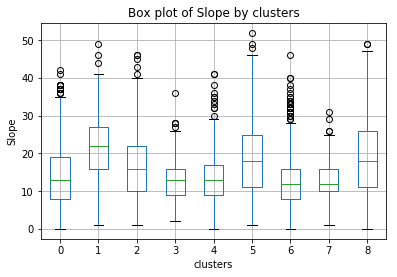

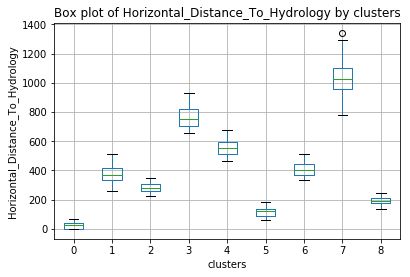

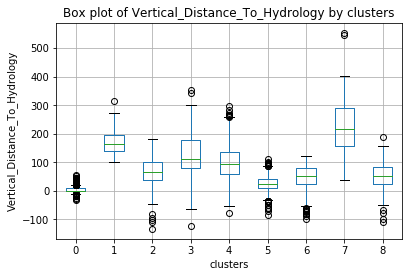

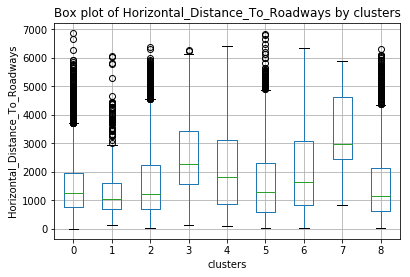

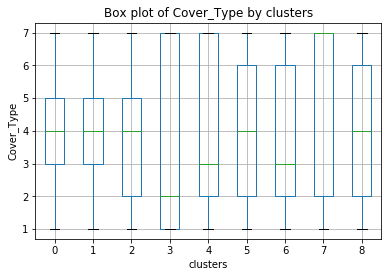

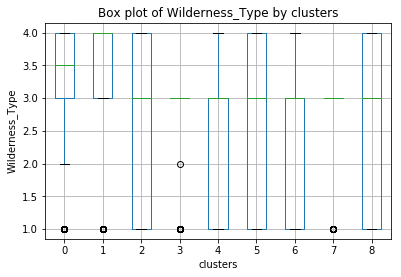

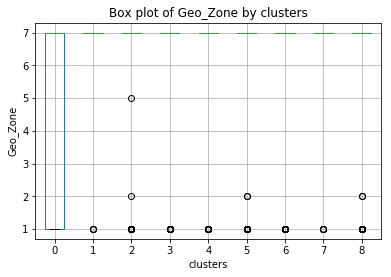

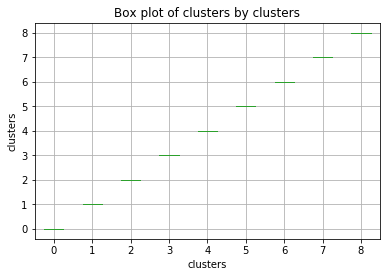

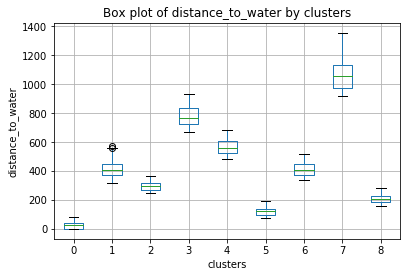

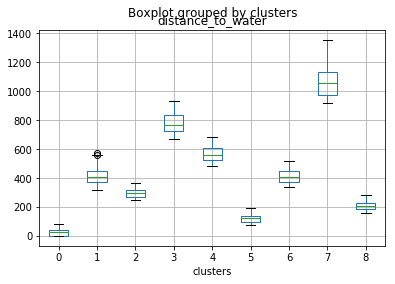

In [240]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### DBSCANS ARGUMENTS
no_clusters = 9
random_state = 4

########################
##MODELLING SECTION
########################
dbs = cluster.KMeans(n_clusters = no_clusters, random_state=random_state, max_iter=150) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model_prep['clusters'] = labels
model['c'] = "count"
model['target'] = model_prep['Geo_Zone']

#########################
## VISUALISE AND VALIDATE
#########################
plot_clusters_graph_kmeans(variable_1,variable_2) # calls function to visualise clusters
validate_test() # calls function to validate model

In [238]:
def create_cluster_summary_kmeans():
    cluster_desc_columns = []#['Cluster','Avg. Dist to Water','Avg. Horz. Dist to Water','Avg. Vert. Dist to Water','Avg. Horz. Dist to Roadways','Avg. Elevation','Avg. Slope','Avg. Aspect','Most common soil type','% Soil type 1','% Soil type 2','% Soil type 3','Most common cover type','% Cover Type 1','% Cover Type 2','% Cover Type 3','% Cover Type 4','% Cover Type 5','% Cover Type 6','% Cover Type 7']
    cluster_descriptions = pd.DataFrame(columns=cluster_desc_columns, index=range(0,len(model_prep.clusters.unique()))) 

    cluster_list = []
    avg_dist_water_list = []
    avg_h_dist_water_list = []
    avg_v_dist_water_list = []
    avg_h_dist_road_list = []
    covertype_cluster_list = []
    prop_covertype01_cluster_list = []
    prop_covertype02_cluster_list = []
    prop_covertype03_cluster_list = []
    prop_covertype04_cluster_list = []
    prop_covertype05_cluster_list = []
    prop_covertype06_cluster_list = []
    prop_covertype07_cluster_list = []
    soiltype_cluster_list = []
    prop_geozone01_cluster_list = []
    prop_geozone02_cluster_list = []
    prop_geozone05_cluster_list = []
    prop_geozone07_cluster_list = []
    elevation_mean_cluster_list = []
    slope_mean_cluster_list = []


    for i in range(0,max(model_prep.clusters)+1):

        cluster_num = i
            
        # WHICH CLUSTER - CREATE MASK AND BUILD CLUSTER LIST
        mask_name = "cluster_descriptions_mask_"+str(cluster_num)
        mask_name = model_prep["clusters"] == cluster_num
        cluster_list.append(cluster_num)
        cluster_array = np.asarray(cluster_list)
     
        # DISTANCE TO WATER - MEAN OF CLUSTER + ADD TO LIST
        water_mean_cluster = model_prep.loc[mask_name,"distance_to_water"].mean()
        avg_dist_water_list.append(water_mean_cluster)
        avg_dist_water_array = np.asarray(avg_dist_water_list)
    
        #AVG HORIZONTAL DISTANCE TO WATER
        h_water_mean_cluster = model_prep.loc[mask_name,"Horizontal_Distance_To_Hydrology"].mean()
        avg_h_dist_water_list.append(h_water_mean_cluster)
        avg_h_dist_water_array = np.asarray(avg_h_dist_water_list)
        
        #AVG VERTICAL DISTANCE TO WATER
        v_water_mean_cluster = model_prep.loc[mask_name,"Vertical_Distance_To_Hydrology"].mean()
        avg_v_dist_water_list.append(v_water_mean_cluster)
        avg_v_dist_water_array = np.asarray(avg_v_dist_water_list)
        
        #AVG HORIZ DISTANCE TO ROADWAYS
        h_road_mean_cluster = model_prep.loc[mask_name,"Horizontal_Distance_To_Roadways"].mean()
        avg_h_dist_road_list.append(h_road_mean_cluster)
        avg_h_dist_road_array = np.asarray(avg_h_dist_road_list)
    
        # MOST COMMON COVER TYPE
        covertype_cluster = model_prep.loc[mask_name,"Cover_Type"].mode()
        covertype_cluster_list.append(covertype_cluster)
        covertype_cluster_array = np.asarray(covertype_cluster_list)
    
        #'PROPORTION OF COVER TYPE 1',
        mask_name_covertype_num_1 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 1) 
        prop_covertype01_cluster = float(model_prep.loc[mask_name_covertype_num_1,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype01_cluster_list.append(prop_covertype01_cluster)
        prop_covertype01_cluster_array = np.asarray(prop_covertype01_cluster_list)   
        
        #'PROPORTION OF COVER TYPE 2',
        mask_name_covertype_num_2 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 2) 
        prop_covertype02_cluster = float(model_prep.loc[mask_name_covertype_num_2,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype02_cluster_list.append(prop_covertype02_cluster)
        prop_covertype02_cluster_array = np.asarray(prop_covertype02_cluster_list)
        
        #'PROPORTION OF COVER TYPE 3',
        mask_name_covertype_num_3 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 3) 
        prop_covertype03_cluster = float(model_prep.loc[mask_name_covertype_num_3,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype03_cluster_list.append(prop_covertype03_cluster)
        prop_covertype03_cluster_array = np.asarray(prop_covertype03_cluster_list)  
        
        #'PROPORTION OF COVER TYPE 4',
        mask_name_covertype_num_4 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 4) 
        prop_covertype04_cluster = float(model_prep.loc[mask_name_covertype_num_4,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype04_cluster_list.append(prop_covertype04_cluster)
        prop_covertype04_cluster_array = np.asarray(prop_covertype04_cluster_list) 
        
        #'PROPORTION OF COVER TYPE 5',
        mask_name_covertype_num_5 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 5) 
        prop_covertype05_cluster = float(model_prep.loc[mask_name_covertype_num_5,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype05_cluster_list.append(prop_covertype05_cluster)
        prop_covertype05_cluster_array = np.asarray(prop_covertype05_cluster_list) 
        
        #'PROPORTION OF COVER TYPE 6',
        mask_name_covertype_num_6 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 6) 
        prop_covertype06_cluster = float(model_prep.loc[mask_name_covertype_num_5,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype06_cluster_list.append(prop_covertype06_cluster)
        prop_covertype06_cluster_array = np.asarray(prop_covertype06_cluster_list) 
    
        #'PROPORTION OF COVER TYPE 7',
        mask_name_covertype_num_7 = (model_prep["clusters"] == cluster_num) & (model_prep["Cover_Type"] == 7) 
        prop_covertype07_cluster = float(model_prep.loc[mask_name_covertype_num_5,"Cover_Type"].count())/float(model_prep.loc[mask_name,"Cover_Type"].count())
        prop_covertype07_cluster_list.append(prop_covertype07_cluster)
        prop_covertype07_cluster_array = np.asarray(prop_covertype07_cluster_list) 
        
        # MOST COMMON SOIL TYPE
        soiltype_cluster = model_prep.loc[mask_name,"Geo_Zone"].mode()
        soiltype_cluster_list.append(soiltype_cluster)
        soiltype_cluster_array = np.asarray(soiltype_cluster_list)
        
        #AVG ELEVATION
        elevation_mean_cluster = model_prep.loc[mask_name,"Elevation"].mean()
        elevation_mean_cluster_list.append(elevation_mean_cluster)
        elevation_mean_cluster_array = np.asarray(elevation_mean_cluster_list)
        
        #AVG SLOPE
        slope_mean_cluster = model_prep.loc[mask_name,"Slope"].mean()
        slope_mean_cluster_list.append(slope_mean_cluster)
        slope_mean_cluster_array = np.asarray(slope_mean_cluster_list)
        
        #'PROPORTION OF GEOZONE 1',
        mask_name_geozone_num_1 = (model_prep["clusters"] == cluster_num) & (model_prep["Geo_Zone"] == 1) 
        prop_geozone01_cluster = float(model_prep.loc[mask_name_geozone_num_1,"Geo_Zone"].count())/float(model_prep.loc[mask_name,"Geo_Zone"].count())
        prop_geozone01_cluster_list.append(prop_geozone01_cluster)
        prop_geozone01_cluster_array = np.asarray(prop_geozone01_cluster_list)  
        
        #'PROPORTION OF GEOZONE 2',
        mask_name_geozone_num_2 = (model_prep["clusters"] == cluster_num) & (model_prep["Geo_Zone"] == 2) 
        prop_geozone02_cluster = float(model_prep.loc[mask_name_geozone_num_2,"Geo_Zone"].count())/float(model_prep.loc[mask_name,"Geo_Zone"].count())
        prop_geozone02_cluster_list.append(prop_geozone02_cluster)
        prop_geozone02_cluster_array = np.asarray(prop_geozone02_cluster_list)  
                
        #'PROPORTION OF GEOZONE 5',
        mask_name_geozone_num_5 = (model_prep["clusters"] == cluster_num) & (model_prep["Geo_Zone"] == 5) 
        prop_geozone05_cluster = float(model_prep.loc[mask_name_geozone_num_5,"Geo_Zone"].count())/float(model_prep.loc[mask_name,"Geo_Zone"].count())
        prop_geozone05_cluster_list.append(prop_geozone05_cluster)
        prop_geozone05_cluster_array = np.asarray(prop_geozone05_cluster_list)  
       
        #'PROPORTION OF GEOZONE 7',
        mask_name_geozone_num_7 = (model_prep["clusters"] == cluster_num) & (model_prep["Geo_Zone"] == 7) 
        prop_geozone07_cluster = float(model_prep.loc[mask_name_geozone_num_7,"Geo_Zone"].count())/float(model_prep.loc[mask_name,"Geo_Zone"].count())
        prop_geozone07_cluster_list.append(prop_geozone07_cluster)
        prop_geozone07_cluster_array = np.asarray(prop_geozone07_cluster_list)  
        
    cluster_descriptions['Cluster'] = cluster_array
    cluster_descriptions['Dist. to Water'] = avg_dist_water_array
    cluster_descriptions['Horiz. Dist. to Water'] = avg_h_dist_water_array
    cluster_descriptions['Vert. Dist. to Water'] = avg_v_dist_water_array
    cluster_descriptions['Elevation'] = elevation_mean_cluster_array
    cluster_descriptions['Slope'] = slope_mean_cluster_array
    cluster_descriptions['Most Common Covertype'] = covertype_cluster_array
    cluster_descriptions['Prop. Covertype 1'] = prop_covertype01_cluster_array
    cluster_descriptions['Prop. Covertype 2'] = prop_covertype02_cluster_array
    cluster_descriptions['Prop. Covertype 3'] = prop_covertype03_cluster_array
    cluster_descriptions['Prop. Covertype 4'] = prop_covertype04_cluster_array
    cluster_descriptions['Prop. Covertype 5'] = prop_covertype05_cluster_array
    cluster_descriptions['Prop. Covertype 6'] = prop_covertype06_cluster_array
    cluster_descriptions['Prop. Covertype 7'] = prop_covertype07_cluster_array
    cluster_descriptions['Most Common Geozone'] = soiltype_cluster_array
    cluster_descriptions['Prop. Geozone 1'] = prop_geozone01_cluster_array
    cluster_descriptions['Prop. Geozone 2'] = prop_geozone02_cluster_array
    cluster_descriptions['Prop. Geozone 5'] = prop_geozone05_cluster_array
    cluster_descriptions['Prop. Geozone 7'] = prop_geozone07_cluster_array
    cluster_descriptions['Horiz. Dist. to Road'] = avg_h_dist_road_array
    cluster_descriptions.sort_values('Dist. to Water')   
    
    return cluster_descriptions

    


In [241]:
cluster_descriptions_kmeans = create_cluster_summary_kmeans()
cluster_descriptions_kmeans.sort_values('Dist. to Water')

,Cluster,Dist. to Water,Horiz. Dist. to Water,Vert. Dist. to Water,Elevation,Slope,Most Common Covertype,Prop. Covertype 1,Prop. Covertype 2,Prop. Covertype 3,Prop. Covertype 4,Prop. Covertype 5,Prop. Covertype 6,Prop. Covertype 7,Most Common Geozone,Prop. Geozone 1,Prop. Geozone 2,Prop. Geozone 5,Prop. Geozone 7,Horiz. Dist. to Road
0,0,27.283909,26.387014,4.517241,2558.366838,14.129494,4,0.114820,0.071900,0.077770,0.363536,0.146368,0.146368,0.146368,7,0.359134,0.000367,0.00000,0.640499,1556.942040
5,5,119.813361,114.482386,26.778977,2711.918182,18.703409,5,0.136932,0.155114,0.162500,0.080682,0.186932,0.186932,0.186932,7,0.103977,0.001136,0.00000,0.894886,1672.204545
8,8,206.033895,194.831273,54.807169,2701.957355,19.062423,5,0.122373,0.150803,0.153276,0.097651,0.191595,0.191595,0.191595,7,0.063659,0.001236,0.00000,0.935105,1590.281829
2,2,295.850514,284.569908,67.031228,2775.972321,16.790632,2,0.154010,0.176721,0.162527,0.086586,0.171043,0.171043,0.171043,7,0.062456,0.000710,0.00071,0.936125,1716.260468
6,6,412.991804,408.353240,48.106734,2910.080051,12.964422,2,0.198221,0.266836,0.108005,0.050826,0.110546,0.110546,0.110546,7,0.083863,0.000000,0.00000,0.916137,2138.238882
1,1,413.090511,375.625392,167.829154,2650.614420,21.648903,4,0.054859,0.084639,0.219436,0.231975,0.164577,0.164577,0.164577,7,0.004702,0.000000,0.00000,0.995298,1350.294671
4,4,568.630258,556.133333,100.375194,3022.545736,13.463566,7,0.193798,0.229457,0.096124,0.029457,0.113178,0.113178,0.113178,7,0.062016,0.000000,0.00000,0.937984,2184.962791
3,3,780.603090,767.133065,122.786290,3190.104839,13.169355,7,0.266129,0.262097,0.000000,0.000000,0.120968,0.120968,0.120968,7,0.072581,0.000000,0.00000,0.927419,2678.100806
7,7,1064.343737,1035.763314,224.798817,3402.071006,13.053254,7,0.142012,0.136095,0.000000,0.000000,0.053254,0.053254,0.053254,7,0.023669,0.000000,0.00000,0.976331,3339.899408


## DBSCANS

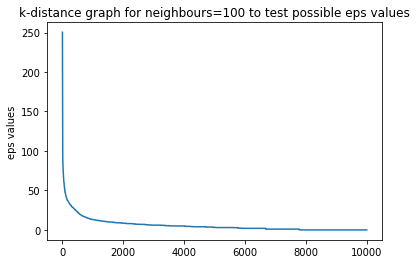

In [222]:
##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 3
variable_2 = 4

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_prep = soil_features_subset.copy(deep=True) 
model_prep.drop(model_prep.index[10000:], inplace=True)
model_df = model_prep.iloc[:,[variable_1,variable_2]]
model = pd.DataFrame(model_df, index=model_df.index, columns=model_df.columns)

##############################################################################
# FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
##############################################################################

# SET UP THE NN TEST
nbrs = NearestNeighbors(n_neighbors=10).fit(model)
distances, indices = nbrs.kneighbors(model)
distances.shape

# CHOOSE THE 100th NEIGHBOUR DISTANCE
kDis = distances[:, 9]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]

# PLOT THE K-DISTANCE GRAPH
plt.plot(range(0,len(kDis)), kDis)
plt.title("k-distance graph for neighbours=100 to test possible eps values")
plt.ylabel("eps values")
plt.show()

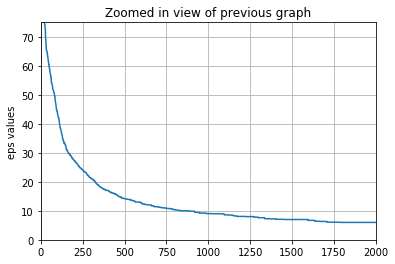

In [63]:
##############################################################################
# ZOOM IN TO SEE CURVE
##############################################################################
plt.plot(range(0,len(kDis)), kDis)
plt.xlim(0,2000)
plt.ylim(0,75)
plt.title("Zoomed in view of previous graph")
plt.ylabel("eps values")
plt.grid()
plt.show()

In [64]:
##############################################################################
# EXPERIMENT WITH THE EPS VALUES ON THE CURVE 
##############################################################################

min_epsilon = 8 ## SET THE BOTTOM RANGE
max_epsilon = 50 ## SET THE TOP RANGE

##############################################################################
## INITIALIZE VARIBALES
##############################################################################

## CREATE AN EMPTY PARAMETERS TABLE
param_columnnames = ['eps_value','min_samples_value','leaf_size','num_of_clusters','Percent_outliers']
best_parameters = pd.DataFrame(columns=param_columnnames) 

## DBSSCAN ARGUMENT VARIATIONS 
## TESTING eps range from bottom to top of the elbow
x = 1 # increment for min epsilon to max epsilon
i = 1 ## INITIALIZING i
t = int(round(((max_epsilon-min_epsilon)/x)+1)) ## SET HOW MANY INCREMENTS OF x STEPS YOU WANT TO DO

# testing argument arrays
ms = [1,5,10,25,50,100,250,500,750,1000] # Minimum sample size values
ls = 'default' # default value set for leaf_size

##############################################################################
## TESTING LOOP
##############################################################################

for i in range(i, t): # loop for epsilon test
 
    m = 0
    m_range = len(ms)
    epsilon = min_epsilon + (i*x)
    

    for m in range(m,m_range): # loop for min_samples test

        dbs = cluster.DBSCAN(eps=epsilon,min_samples=ms[m]) # Run the model
        dbs_fit = dbs.fit(model)
        labels = dbs_fit.labels_
        model['clusters'] = labels
        
        outliers_mask = model["clusters"]== -1
        
        ##############################################################################
        # ADDING A ROW TO THE PARAMETERS TABLE
        ##############################################################################
        best_parameters = best_parameters.append({'eps_value':epsilon,
                                          'min_samples_value':ms[m],
                                           'leaf_size':ls,
                                          'num_of_clusters': model["clusters"].max(axis=0) + 2, 
                                            'Percent_outliers': (float(model.loc[outliers_mask,"clusters"].shape[0])/float(model_prep.shape[0]))*100 }, ignore_index=True)

        
        m = m + 1
    
    i = i + 1


print("A paramters test for Horiz. to Vert. Distance to Hydrology DBSCAN model"+'\n')
print(best_parameters)

A paramters test for Horiz. to Vert. Distance to Hydrology DBSCAN model

    eps_value min_samples_value leaf_size num_of_clusters  Percent_outliers
0           9                 1   default             274              0.00
1           9                 5   default              27              4.01
2           9                10   default              25              6.97
3           9                25   default              15             15.92
4           9                50   default              15             28.79
5           9               100   default              11             46.70
6           9               250   default               6             66.62
7           9               500   default               3             84.06
8           9               750   default               2             91.33
9           9              1000   default               1            100.00
10         10                 1   default             232              0.00
11         10  

### SELECTED VALUES: EPS = 15, minPts = 10

/Users/ellenitoumpas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ellenitoumpas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


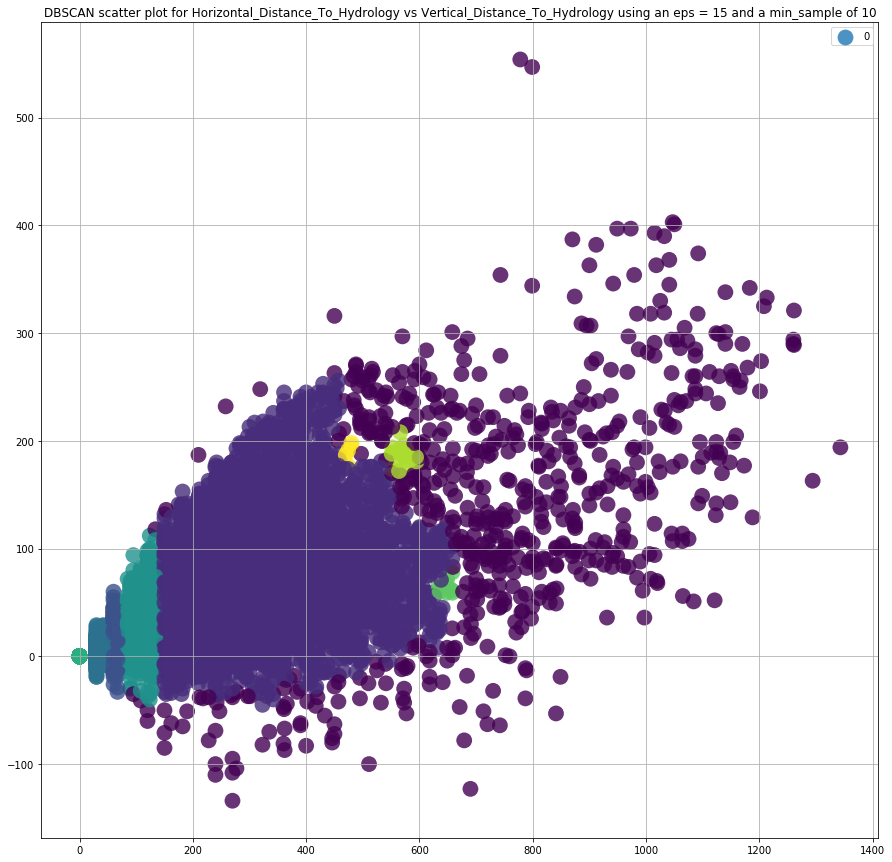

/Users/ellenitoumpas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


This is the confusion matrix

d_group      1    2    3    4    5    6    7    8     9
clusters                                               
-1           0    0    0    0    1    3    2    4   623
 0           0    0    0    0    0  111  275  561  4193
 1           0    0    0  609    3    0    0    0     0
 2           0  795  296    0    0    0    0    0     0
 3           0    0    0    0  626  773   20    1     0
 4        1069    0    0    0    0    0    0    0     0
 5           0    0    0    0    0    0    0    0    11
 6           0    0    0    0    0    0    0    0    19
 7           0    0    0    0    0    0    0    0     5


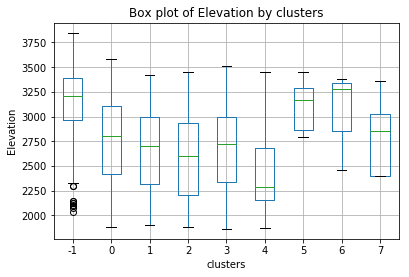

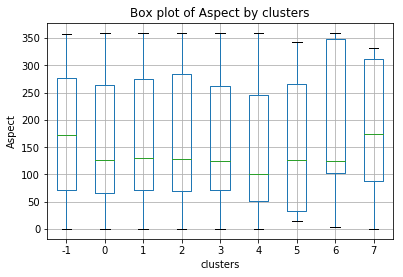

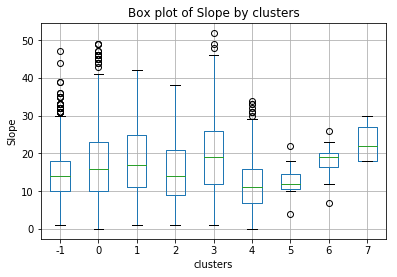

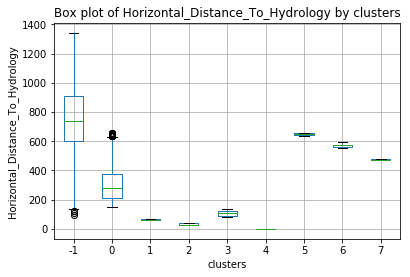

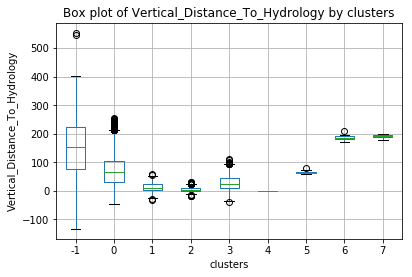

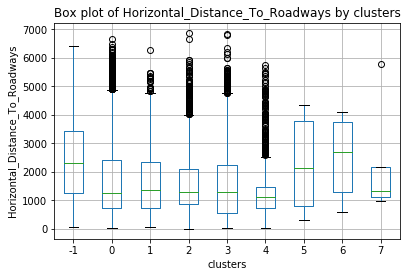

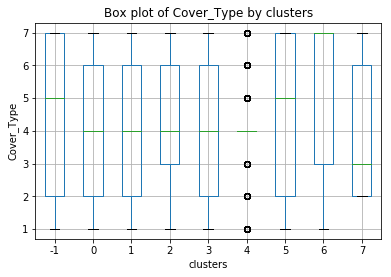

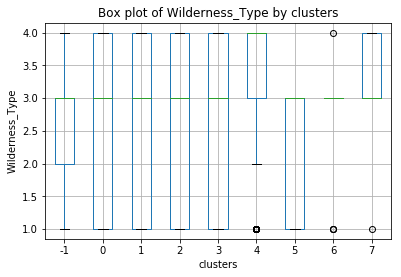

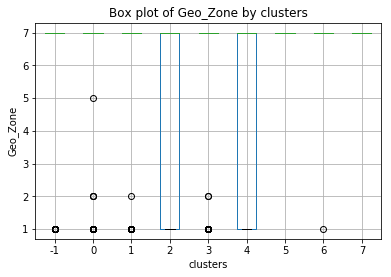

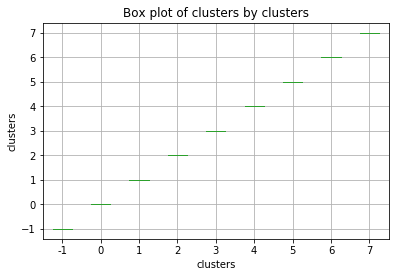

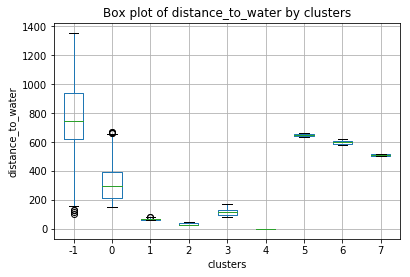

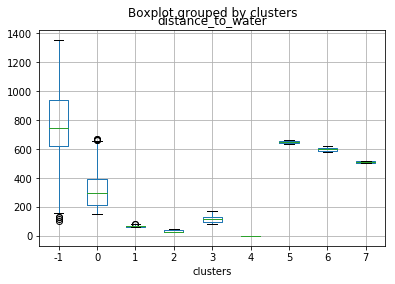

In [236]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### CHOSEN ARGUMENTS
epsilon = 15
minPts = 10

##############################################################################
# INITIALIZING MODEL PARAMETERS FOR TESTING
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 3
variable_2 = 4



# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_prep = soil_features_subset.copy(deep=True) 
model_prep.drop(model_prep.index[10000:], inplace=True)
model = model_prep.iloc[:,[variable_1,variable_2]] 

########################
##MODELLING SECTION
########################
dbs = cluster.DBSCAN(eps=epsilon,min_samples=minPts) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model_prep['clusters'] = labels
model['c'] = "count"
method = "dbscans"
#model['target'] = model_prep['Cover_Type']

#########################
## VISUALISE AND VALIDATE
#########################
plot_clusters_graph(variable_1,variable_2) # calls function to visualise clusters
validate_test() # calls function to validate model 

In [237]:
cluster_descriptions_dbscans = create_cluster_summary_dbscans()
cluster_descriptions_dbscans.sort_values('Dist. to Water')
#cluster_descriptions_dbscans.sort_values('Dist. to Water').to_csv("cluster_descriptions_EPS11_MP100_fromFunction.csv")

,Cluster,Dist. to Water,Horiz. Dist. to Water,Vert. Dist. to Water,Elevation,Slope,Most Common Covertype,Prop. Covertype 1,Prop. Covertype 2,Prop. Covertype 3,Prop. Covertype 4,Prop. Covertype 5,Prop. Covertype 6,Prop. Covertype 7,Most Common Geozone,Prop. Geozone 1,Prop. Geozone 2,Prop. Geozone 5,Prop. Geozone 7,Horiz. Dist. to Road
5,4,0.000000,0.000000,0.000000,2430.535080,11.713751,4,0.071094,0.037418,0.032741,0.619270,0.114125,0.114125,0.114125,7,0.469598,0.000000,0.000000,0.530402,1301.434986
3,2,34.324525,33.244730,5.306141,2599.469294,14.998167,4,0.135655,0.082493,0.086159,0.255729,0.153071,0.153071,0.153071,7,0.340055,0.000000,0.000000,0.659945,1690.651696
2,1,66.070388,63.294118,13.390523,2682.632353,17.959150,5,0.145425,0.107843,0.155229,0.111111,0.183007,0.183007,0.183007,7,0.173203,0.001634,0.000000,0.825163,1712.924837
4,3,114.066937,108.309155,28.611268,2699.392958,19.073239,5,0.133099,0.148592,0.171127,0.083803,0.192254,0.192254,0.192254,7,0.104930,0.001408,0.000000,0.893662,1644.709859
1,0,314.737007,302.270039,72.035798,2783.369261,16.973735,2,0.143580,0.177432,0.149027,0.094358,0.160117,0.160117,0.160117,7,0.061479,0.000584,0.000195,0.937743,1760.434630
8,7,512.034215,475.600000,189.600000,2807.000000,23.000000,2,0.000000,0.400000,0.200000,0.000000,0.000000,0.000000,0.000000,7,0.000000,0.000000,0.000000,1.000000,2276.800000
7,6,599.842726,569.947368,186.789474,3108.684211,18.000000,7,0.105263,0.000000,0.263158,0.000000,0.105263,0.105263,0.105263,7,0.052632,0.000000,0.000000,0.947368,2610.842105
6,5,650.478947,647.272727,64.272727,3089.181818,12.727273,7,0.181818,0.181818,0.000000,0.000000,0.272727,0.272727,0.272727,7,0.000000,0.000000,0.000000,1.000000,2379.727273
0,-1,767.063643,745.399684,143.142180,3166.489731,14.699842,7,0.206951,0.219589,0.036335,0.011058,0.127962,0.127962,0.127962,7,0.061611,0.000000,0.000000,0.938389,2536.259084
